In [10]:
from __future__ import print_function
import os
data_path = ['data']

In [186]:
import pandas as pd
import numpy as np

# Read in data https://www.cbo.gov/sites/default/files/114th-congress-2015-2016/reports/51846-supplementaldata.xlsx
# converted in to csv
filepath = os.sep.join(data_path + ['wealth.csv'])
data = pd.read_csv(filepath,index_col=0,header=0)

# Return ndarray 
X_real = np.linspace(0, 1.0, 10)

# clean extra rows
s = data[0:9]

# Make percent dependant 
# t = s.transpose()
# Remove year so 0 = 1989
# r = np.linspace(0,8 * 3,9).T


In [187]:
# Poor 0 -50
P_data = s.iloc[:,:5].sum(1)
# Mid 50 - 90
M_data = s.iloc[:,5:9]
M_sum = M_data.sum(1)
# Rest 0 - 90
R_data = s.iloc[:,:9]
R_sum = R_data.sum(1)
# Top 10%
T_data = s[['90']]
T_sum = T_data
print(R_data,R_sum,T_data)

        0   10   20   30   40   50   60   70    80
year                                              
1989 -0.2  0.0  0.3  0.9  1.9  3.2  5.0  7.8  13.6
1992 -0.3  0.1  0.4  1.1  2.0  3.3  5.2  7.8  12.9
1995 -0.3  0.1  0.5  1.1  2.1  3.3  4.9  7.4  12.4
1998 -0.3  0.1  0.4  1.0  1.9  3.1  4.7  7.4  12.5
2001 -0.2  0.1  0.3  0.9  1.7  2.7  4.4  7.2  12.7
2004 -0.2  0.1  0.3  0.8  1.6  2.7  4.3  7.2  13.2
2007 -0.2  0.1  0.3  0.8  1.6  2.7  4.3  6.7  11.7
2010 -0.7  0.0  0.2  0.5  1.1  2.1  3.6  6.1  12.1
2013 -0.7  0.0  0.2  0.5  1.1  2.0  3.6  6.0  11.7 year
1989    32.5
1992    32.5
1995    31.5
1998    30.8
2001    29.8
2004    30.0
2007    28.0
2010    25.0
2013    24.4
dtype: float64         90
year      
1989  67.5
1992  67.5
1995  68.5
1998  69.3
2001  70.2
2004  70.0
2007  72.1
2010  75.0
2013  75.7


In [188]:
# get change in wealth by year
tdiff = T_data.diff()
rdiff = R_data.diff()

In [189]:
# Setup plot
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline



In [190]:
# Get input year
X_data = np.linspace(1989, 2013, 9)
# print(X_data)



In [191]:
# create forecast years
f_data = np.linspace(1989, 2034, 16)
# print(f_data)

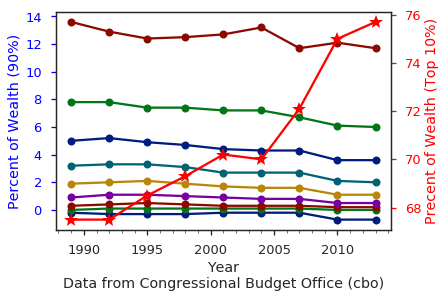

In [197]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

ax = plt.axes()
dx = ax.twinx()
# absoulet terms
# bx = s.plot(ls='-', marker='o', markersize='4', label='data')


dx.plot(X_data, T_data, marker='*', markersize='15', ls='-', c='r', alpha=1)

#tlbl = dx.plot(f_data, T_pred, marker='^', alpha=.5, c='r', label='Top 10%')
dx.set_ylabel('Precent of Wealth (Top 10%)', color='r')
#dx.set_ylim(65,100)
dx.tick_params(axis='y', labelcolor='r', length=5, color='r')

ax.plot(X_data, R_data,'o', markersize='8', ls='-', alpha=1)
ax.set_ylabel('Percent of Wealth (90%)', color='b')
ax.tick_params(axis='y', labelcolor='b', length=5, color='b')
ax.tick_params(axis='x', length=5)
ax.minorticks_on()
ax.tick_params(axis='x', length=3, which='minor' )
ax.set_xlabel('Year\nData from Congressional Budget Office (cbo)')


ax.legend()

# diff plot
# ax = a.plot(ls='-', marker='o', markersize='4', label='data')


 

In [200]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 5
pf = PolynomialFeatures(degree)
lr = LinearRegression(copy_X=True)

# for fitting
X_poly = pf.fit_transform(X_data.reshape(-1,1))
f_poly = pf.fit_transform(f_data.reshape(-1,1))

# Fit the top
Tlr = lr.fit(X_poly, T_data)
T_pred = Tlr.predict(f_poly)

# fit the Poor
Plr = lr.fit(X_poly, P_data)
P_pred = Plr.predict(f_poly)

# fit 90% of america
Rlr = lr.fit(X_poly, R_sum)
R_pred = Rlr.predict(f_poly)

# fit the Middle class
Mlr = lr.fit(X_poly, M_sum)
M_pred = Mlr.predict(f_poly)


fut = zip(f_data.flatten(),T_pred.flatten())
#print(list(fut))

fut = zip(f_data.flatten(),R_pred.flatten())
#print(list(fut))
#print(lr.coef_)
#print(Y_pred)
#print(R_pred)

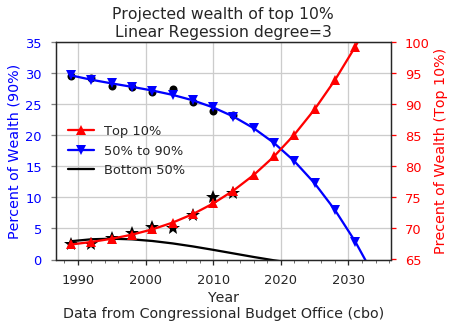

In [201]:
ax = plt.axes()
px = ax.twinx()

px.plot(X_data,T_data, marker='*', markersize='15', ls='', c='k', alpha=1)
tlbl = px.plot(f_data, T_pred, marker='^', c='r', label='Top 10%')
px.set_ylabel('Precent of Wealth (Top 10%)', color='r')
px.set_ylim(65,100)
px.tick_params(axis='y', labelcolor='r', length=5, color='r')

ax.plot(X_data,M_sum, marker='o', markersize='8', ls='', c='k')
albl = ax.plot(f_data, M_pred, marker='v', c='b', label='50% to 90%')
#mlbl = ax.plot(f_data, M_pred, marker='v', alpha=.5, c='g')
plbl = ax.plot(f_data, P_pred, marker='', c='black', label='Bottom 50%')
ax.set_ylabel('Percent of Wealth (90%)', color='b')
ax.set_ylim(0,35)
ax.tick_params(axis='y', labelcolor='b', length=5, color='grey')
ax.tick_params(axis='x', length=5)
ax.minorticks_on()
ax.tick_params(axis='x', length=3, which='minor' )
ax.set_xlabel('Year\nData from Congressional Budget Office (cbo)')
ax.grid(True)

lbl = tlbl + albl + plbl
la = [i.get_label() for i in lbl]
plt.legend(lbl, la, loc=6)

# plt.text(1989,95,'Congressional Budget Office Data')
plt.title('Projected wealth of top 10%\nLinear Regession degree=3')

plt.savefig("top10wealth.svg")
# https://www.cbo.gov/publication/51846

In [183]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = Tlr.coef_.ravel()

coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression
count,6.000000e+00
mean,7.465974e-05
std,1.824893e-04
min,0.000000e+00
25%,2.861606e-09
50%,1.735918e-07
75%,4.191924e-07
max,4.471642e-04
